In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel("/Users/hyde/Dropbox/UArizona/Econometrics II 522B/Shiller data.xlsx",\
                     sheet_name = 0,\
                     header = 7)

a. Calculate return ($R_t = \frac{D_t + P_t - P_{t-1}}{P_{t-1}}$) and $Y_t = 1$ if $R_t > 0$.

In [4]:
Return = (data.Dividend + data.Price - data.Price.shift(1)) / data.Price.shift(1)

Text(0.5,0,'Year')

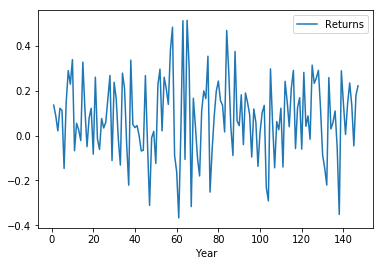

In [5]:
Return.plot(label="Returns")
plt.legend()
plt.xlabel('Year')

In [6]:
Y = (Return > 0)

b. Calculate 10-year average of earnings, $X$.

$$
X = \frac{Price_t}{\frac{1}{10} \sum_{k=0}^{9}Earnings_{t-k}}
$$

In [7]:
Earnings_rolling = data.Earnings.rolling(window=10,min_periods=10,center=False).mean()

Text(0.5,0,'Year')

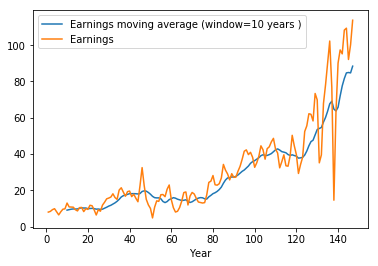

In [8]:
Earnings_rolling.plot(label="Earnings moving average (window=10 years )")
data.Earnings.plot(label="Earnings")
plt.legend()
plt.xlabel('Year')

In [9]:
X = data.Price / Earnings_rolling

c. Estimate $Y$ given $X$ by Probit model.

$$
Pr(Y>0 \mid X) = \Phi(\alpha + \beta X)
$$

Text(0.5,0,'Year')

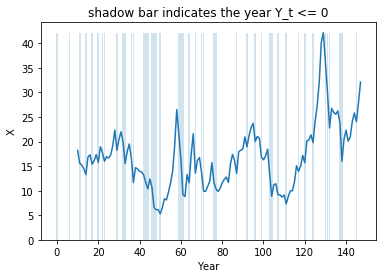

In [10]:
X.plot(title = "shadow bar indicates the year Y_t <= 0")
plt.bar(Y[Y == False].index, height=X.max(), alpha=0.2)
plt.ylabel('X')
plt.xlabel('Year')

In [11]:
exog = sm.add_constant(X)
exog = exog.rename(columns={0: "X"});

In [12]:
probit_mod = sm.Probit(Y[10:], exog[10:])
probit_res = probit_mod.fit()
print(probit_res.summary())

Optimization terminated successfully.
         Current function value: 0.611348
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  138
Model:                         Probit   Df Residuals:                      136
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Sep 2018   Pseudo R-squ.:                 0.02339
Time:                        17:14:15   Log-Likelihood:                -84.366
converged:                       True   LL-Null:                       -86.387
                                        LLR p-value:                   0.04439
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1139      0.315     -0.362      0.718      -0.731       0.503
X              0.0357      0.

The probit results show that

$$
\hat{\alpha} = -0.1139 \\
\hat{\beta} = 0.0357
$$

d. Estimate the logit model.

$$
Pr(Y>0 \mid X) = \frac{e^{\delta + \gamma X}}{1 + e ^ {\delta + \gamma X}}
$$

In [13]:
logit_mod = sm.Logit(Y[10:], exog[10:])
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  138
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Sep 2018   Pseudo R-squ.:                 0.02380
Time:                        17:14:15   Log-Likelihood:                -84.331
converged:                       True   LL-Null:                       -86.387
                                        LLR p-value:                   0.04259
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2335      0.533     -0.438      0.661      -1.278       0.810
X              0.0610      0.032      1.928      0.054      -0.001       0.123


The logit model results show that 

$$
\hat{\delta} = -0.2335 \\
\hat{\gamma} = 0.0610
$$

e. Using one of the models to predict $Y$.

Choose probit model.

In [14]:
Y_predict_positive = probit_res.predict(exog[10:]) >= 0.5

In [15]:
(Y_predict_positive.values == Y[10:].values)[Y[10:] == True].all()

True

The probit is always successfully predicting a positive return.

f. Can we conclude that the ratio (Price / Average Earnings) is a good predictor of real returns?

A: No. Actually, the Probit and Logit models results all predict positive returns all the time.

In [16]:
(probit_res.predict(exog[10:]) >= 0.5).all()

True

In [17]:
(logit_res.predict(exog[10:]) >= 0.5).all()

True

This means that we predict positive returns successfully all the time, but fail to predict any negative returns. The ratio is indeed a bad predictor.

g. Would the results from c,d,e be the same if instead we used log returns?

Yes, approximately the results would be the same.

Note that

$$
r_t = \ln(P_t + D_t) - \ln(P_{t-1}) = \ln{\frac{P_t + D_t}{P_{t-1}}} = \ln{(\frac{P_t + D_t - P_{t-1}}{P_{t-1}} + 1)}.
$$

Using the result that

$$
\ln{(\Delta + 1)} \approx \Delta,
$$

if $\Delta$ is sufficiently small, we have

$$
r_t \approx R_t.
$$